# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [10]:
print(f'Beginning Data Retrieval')
print(f'--------------------------')

#creating counters for each column in new dataframes
city_names = []
lat_list = []
lng_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#weather check on each city using API calls
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        time.sleep(1)
            #pprint(response)
        city_names.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except(KeyError):
        print("City not found")
print(f'------------------------')
print(f'Data Retrieval Complete')
print(f'------------------------')

Beginning Data Retrieval
--------------------------
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#dataframe for above information
weather_df = pd.DataFrame({"City": city_names,
                          "Lat": lat_list,
                          "Lng": lng_list,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})

#test run to reveal there are 566 cities in the dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.22,15.64,-5.00,73,20,3.60,SJ,1603376742
1,Iqaluit,63.75,-68.51,-2.00,79,75,3.50,CA,1603376743
2,Busselton,-33.65,115.33,11.11,83,0,6.51,AU,1603376668
3,Weligama,5.97,80.42,26.76,83,34,4.14,LK,1603376669
4,Yellowknife,62.46,-114.35,-5.00,85,90,3.60,CA,1603376460
...,...,...,...,...,...,...,...,...,...
562,Ulety,51.36,112.48,-1.41,94,0,0.92,RU,1603377682
563,Arrondissement de Beauvais,49.42,2.00,19.00,77,75,5.70,FR,1603377683
564,Gazli,40.13,63.45,10.93,50,100,3.73,UZ,1603377685
565,Vila,42.03,-8.16,14.44,82,47,3.13,PT,1603377686


In [18]:
#exporting the above dataframe into a csv file
weather_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
#  Get the indices of cities that have humidity over 100%.
#no humidity over 100 - skipping step
weather_df.Humidity.values

array([ 73,  79,  83,  83,  85, 100,  72,  85,  56,  73,  59,  82,  83,
        62,  96,  77, 100,  25,  86,  83,  72,  87,  83,  77,  95,  97,
        65,  76,  70,  79,  77,  54,   9,  72,  30,  73,  12,  24,  88,
        80,  20,  48,  78,  81,  82,  96,  67,  39,  91,  84,  69,  94,
        65,  52,  71,  69,  67,  63,  85, 100,  73,  65,  75,  79,  74,
        77,  93,  15,  64,  96,  91,  20,  90,  50,  95,  86,  93,  84,
        69,  95,  93,  95,  60,  88,  69,  56,  80,   8,  36,  93,  66,
        90,  75,  41,  32,  61,  92,  73,  94,  74,  73,  68,  76,  81,
        62,  78,  66,  92,  81,  64,  96,  81,  79,  80,  82,  25,  61,
        93,  94,  75,  34,  80,  85,  66,  81,  92,  49,  77,  85,  87,
        70,  71,  70,  79,  90,  94,  86,  66,  87,  92,  76,  84,  58,
        94,  66,  44,  66,  96,  78,  74,  77,  71,  67,  94,  80,  93,
        65,  84,  65,  34,  73,  85,  50,  88,  75,  27,  81,  68,  83,
        73,  91,  76,  64,  40,  82,  92,  86,  74,  87,  72,  4

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

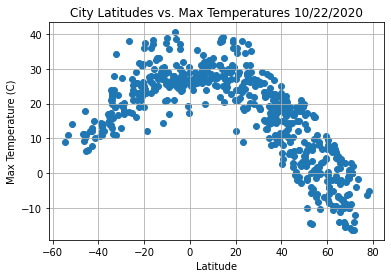

In [41]:
#scatter plot for latitude vs. temp
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])

#set lables
plt.title("City Latitudes vs. Max Temperatures 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Max Temp.png")

## Latitude vs. Humidity Plot

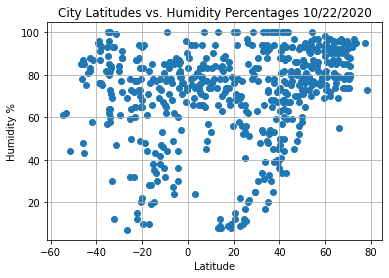

In [43]:
#scatter plot for latitude vs. humidity
plt.scatter(weather_df['Lat'], weather_df['Humidity'])

#set lables
plt.title("City Latitudes vs. Humidity Percentages 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Humidity.png")

## Latitude vs. Cloudiness Plot

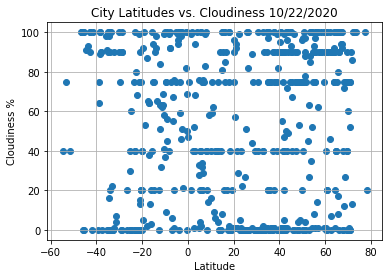

In [45]:
#scatter plot for latitude vs. humidity
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])

#set lables
plt.title("City Latitudes vs. Cloudiness 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

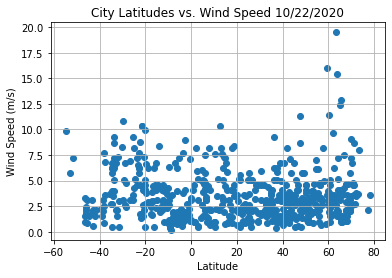

In [48]:
#scatter plot for latitude vs. humidity
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])

#set lables
plt.title("City Latitudes vs. Wind Speed 10/22/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

#saving into a png file
plt.savefig("output_data/png files/City Lat vs. Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression